In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats
from scipy.stats import uniform

In [85]:
df = pd.read_csv('D:\File_Analisa_Python\POSISI_KREDIT.csv', sep='|')

df = df.drop(index=2044850)
df['KOLTYPE'] = ['PL' if x in (1,2) else 'NPL' for x in df['KOLJUNI']]

df

,POSISI,CABANG,RO,ACCTNO,CBAL,ORGAMT,KOLJUNI,GROUP_DESC,JNS_KRD,LONDSC,SEGMEN,LNTYPE,STATREK,KOLTYPE
0,"July 31, 2023",15. BOGOR,RO 1,1.501021e+12,3157461.0,36000000.0,1.0,KPR-RMH SEHAT SEDERH,CONSUMER LOAN,KREDIT KPR,SUBSIDI,1J,1.0,PL
1,"July 31, 2023",15. BOGOR,RO 1,1.501021e+12,9307740.0,36000000.0,2.0,KPR-RMH SEHAT SEDERH,CONSUMER LOAN,KREDIT KPR,SUBSIDI,1J,1.0,PL
2,"July 31, 2023",133. CIKARANG,RO 1,1.330102e+13,40538121.0,85000000.0,1.0,KPR TAPAK SEJAHTERA,CONSUMER LOAN,KREDIT KPR,SUBSIDI,FT,1.0,PL
3,"July 31, 2023",16. BEKASI,RO 1,1.601023e+12,23660159.0,69500000.0,1.0,KPR TAPAK SEJAHTERA,CONSUMER LOAN,KREDIT KPR,SUBSIDI,FT,1.0,PL
4,"July 31, 2023",16. BEKASI,RO 1,1.601024e+12,40928690.0,77000000.0,1.0,KPR TAPAK SEJAHTERA,CONSUMER LOAN,KREDIT KPR,SUBSIDI,FT,1.0,PL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2044845,"July 31, 2023",8. PALEMBANG,RO 4,8.010213e+11,156380000.0,156380000.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,PL
2044846,"July 31, 2023",8. PALEMBANG,RO 4,8.010213e+11,142975000.0,142975000.0,1.0,KPR TAPAK SEJAHTERA,CONSUMER LOAN,KREDIT KPR,SUBSIDI,H9,1.0,PL
2044847,"July 31, 2023",8. PALEMBANG,RO 4,8.010213e+11,144900000.0,144900000.0,1.0,KPR TAPAK SEJAHTERA,CONSUMER LOAN,KREDIT KPR,SUBSIDI,H9,1.0,PL
2044848,"July 31, 2023",15. BOGOR,RO 1,1.501021e+12,144995000.0,144995000.0,1.0,KPR TAPAK SEJAHTERA,CONSUMER LOAN,KREDIT KPR,SUBSIDI,H9,1.0,PL


In [107]:
df_group1 = df[['KOLTYPE','RO','CABANG','CBAL','ORGAMT','KOLJUNI']]

df_group1 = df_group1.groupby(['KOLTYPE','RO','CABANG']).agg(JUMLAH=('CABANG','count'), TOTALCBAL=('CBAL','sum'), TOTALORG=('ORGAMT','sum')).reset_index()

df_group1.groupby('KOLTYPE').sum()

C:\Users\Data Analytic\AppData\Local\Temp\ipykernel_21092\226691708.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group1.groupby('KOLTYPE').sum()


,JUMLAH,TOTALCBAL,TOTALORG
KOLTYPE,,,
NPL,144334,2.165158e+13,3.523924e+13
PL,1900516,2.634222e+14,3.533222e+14


<Axes: xlabel='TOTALCBAL', ylabel='TOTALORG'>

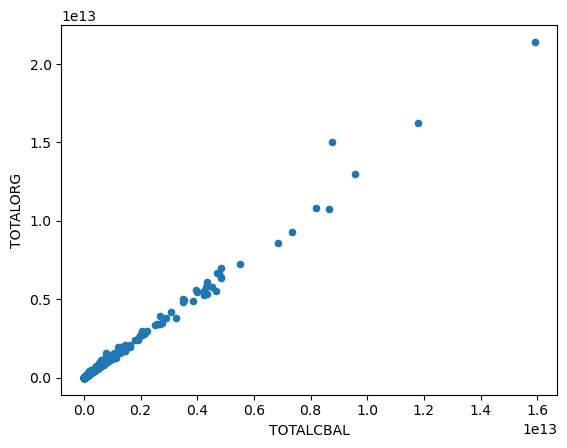

In [87]:
df_group = df.groupby(['POSISI','RO','CABANG','KOLJUNI']).agg(JUMLAH=('ACCTNO','count'), TOTALCBAL=('CBAL','sum'), TOTALORG=('ORGAMT','sum')).reset_index()

df_group.plot.scatter(x='TOTALCBAL', y='TOTALORG')

#.pivot(index='RO', columns='KOLJUNI', values='JUMLAH')